<a href="https://colab.research.google.com/github/zeynepguney/GMKA_Zeynep_Guney/blob/main/Odev3_Python_Veri_Analizi_Egitimi__ogrenci_zeynep_guney_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Güney Marmara ve TRAI
# <center> Python Veri Analizi Eğitimi
# <center> Ödev 3

In [1]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### 2021 EUR/TRY kur tablosunun incelenmesi

1. <i> Yahoo Finance</i> sitesinden 2021 yılına ait EUR/TRY kur değerlerini indiriniz

In [2]:
euro = yf.download("EURTRY=X", start="2022-01-01", end="2022-12-31")
euro

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,15.177660,15.71496,14.549500,15.189530,15.189530,0
2022-01-04,14.678350,15.32340,14.641780,14.763000,14.763000,0
2022-01-05,15.073550,15.44457,14.986400,15.071520,15.071520,0
2022-01-06,15.432200,15.68613,15.211400,15.445910,15.445910,0
2022-01-07,15.486110,15.72783,15.480200,15.434040,15.434040,0
...,...,...,...,...,...,...
2022-12-26,19.759489,19.87315,19.630131,19.734200,19.734200,0
2022-12-27,19.773390,19.96250,19.769699,19.815269,19.815269,0
2022-12-28,19.778601,19.97440,19.778601,19.805389,19.805389,0


2. Veriyi özet metodları ile inceleyiniz

In [3]:
euro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,15.17766,15.71496,14.54950,15.18953,15.18953,0
2022-01-04,14.67835,15.32340,14.64178,14.76300,14.76300,0
2022-01-05,15.07355,15.44457,14.98640,15.07152,15.07152,0
2022-01-06,15.43220,15.68613,15.21140,15.44591,15.44591,0
2022-01-07,15.48611,15.72783,15.48020,15.43404,15.43404,0


In [4]:
euro.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,19.759489,19.87315,19.630131,19.734200,19.734200,0
2022-12-27,19.773390,19.96250,19.769699,19.815269,19.815269,0
2022-12-28,19.778601,19.97440,19.778601,19.805389,19.805389,0
2022-12-29,19.868549,19.96678,19.846180,19.867519,19.867519,0
2022-12-30,19.938971,20.02462,19.903080,19.937571,19.937571,0


In [5]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [6]:
euro.describe()

,Open,High,Low,Close,Adj Close,Volume
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0
mean,17.349109,17.491516,17.266232,17.349623,17.349623,0.0
std,1.427226,1.415720,1.433103,1.427795,1.427795,0.0
min,14.678350,15.138500,14.549500,14.763000,14.763000,0.0
25%,15.929455,16.034792,15.829572,15.926905,15.926905,0.0
50%,17.745120,17.935439,17.685260,17.739679,17.739679,0.0
75%,18.273850,18.392888,18.194242,18.271931,18.271931,0.0
max,19.938971,20.024620,19.903080,19.937571,19.937571,0.0


In [7]:
euro.shape

(260, 6)

3. Veri temizleme: <br>
	• Tabloda sadece "Adj Close" (düzeltilmiş kapanış) sütununu bırakınız.<br>
	• "Adj Close" sütununu " Kapanış (TRY)" olarak yeniden adlandırınız.

In [8]:
euro = euro[['Adj Close']]

In [9]:
euro.columns = ['Kapanış (TRY)']
euro

,Kapanış (TRY)
Date,
2022-01-03,15.189530
2022-01-04,14.763000
2022-01-05,15.071520
2022-01-06,15.445910
2022-01-07,15.434040
...,...
2022-12-26,19.734200
2022-12-27,19.815269
2022-12-28,19.805389


4. Tabloya yeni sütun ekleme:<br>
	• Tabloya yeni bir sütun ekleyerek Kapanış (TRY) değerlerini 1 Ocak 2021 tarihindeki kapanış değerine göre normalize ediniz.<br>
	• BIST30 endeksinin 2021 yılı boyunca değişimini yorumlayınız.

In [10]:
euro["Normalize Kapanış (TRY)"] = euro["Kapanış (TRY)"] / euro.iloc[0,0]
euro

<ipython-input-10-927d539b2b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro["Normalize Kapanış (TRY)"] = euro["Kapanış (TRY)"] / euro.iloc[0,0]


,Kapanış (TRY),Normalize Kapanış (TRY)
Date,,
2022-01-03,15.189530,1.000000
2022-01-04,14.763000,0.971919
2022-01-05,15.071520,0.992231
2022-01-06,15.445910,1.016879
2022-01-07,15.434040,1.016097
...,...,...
2022-12-26,19.734200,1.299197
2022-12-27,19.815269,1.304535
2022-12-28,19.805389,1.303884


In [11]:
B30 = yf.download('XU030.IS', start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [12]:
B30 = B30[["Adj Close"]]

In [13]:
B30.columns = ["Bist30"]
B30

,Bist30
Date,
2021-01-04,1652.900024
2021-01-05,1640.400024
2021-01-06,1657.699951
2021-01-07,1678.199951
2021-01-08,1694.400024
...,...
2021-12-24,2086.800049
2021-12-27,2089.399902
2021-12-28,2032.900024


In [14]:
B30["Normalize  BIST30"] = B30["Bist30"] / B30.iloc[0,0]
B30

<ipython-input-14-1195154d02c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B30["Normalize  BIST30"] = B30["Bist30"] / B30.iloc[0,0]


,Bist30,Normalize BIST30
Date,,
2021-01-04,1652.900024,1.000000
2021-01-05,1640.400024,0.992438
2021-01-06,1657.699951,1.002904
2021-01-07,1678.199951,1.015306
2021-01-08,1694.400024,1.025107
...,...,...
2021-12-24,2086.800049,1.262508
2021-12-27,2089.399902,1.264081
2021-12-28,2032.900024,1.229899


<Axes: xlabel='Date'>

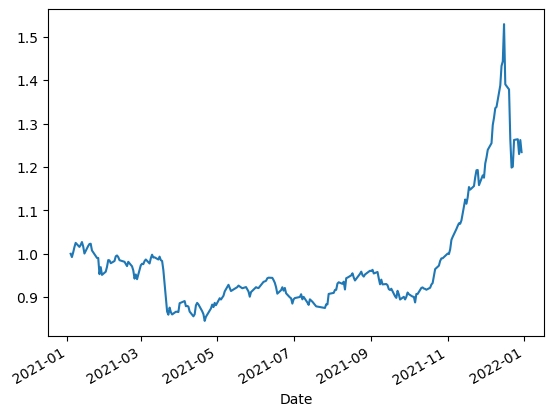

In [15]:
B30["Normalize  BIST30"].plot()

Fiyat değeri yıl sonuna kadar bir alçalıp bir düşerek nötr bir şekilde ilerlemiş. Kasım ayında bir jump yapmış ve %50 artış göstermiş sonra yeniden düşüşe geçmiş.

5. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloyu px grafiği olarak görselleştiriniz.<br>
	• Tabloyu go. grafiği olarak görselleştiriniz.

In [16]:
bist_euro = B30.merge(euro, left_index=True, right_index=True)
bist_euro["Normalize Kapanış (TRY)"] = bist_euro["Kapanış (TRY)"] / bist_euro.iloc[0,2]
bist_euro

IndexError: ignored

### 2021 ve 2022 değerlerini birlikte inceleme

1. <i> Yahoo Finance</i> sitesinden 2022 BIST30 ve EUR/TRY kur değerlerini indiriniz

In [21]:
indirme_listesi = ['XU030.IS', 'EURTRY=X']
bist30_2022 = pd.DataFrame()

for i in indirme_listesi:
  data = yf.download(i, start='2022-01-01', end='2023-01-01')
  data = data["Adj Close"].rename(i)
  bist30_2022 = pd.concat([bist30_2022, data], axis=1)

bist30_2022

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,XU030.IS,EURTRY=X
2022-01-03,2109.500000,15.189530
2022-01-04,2157.000000,14.763000
2022-01-05,2212.300049,15.071520
2022-01-06,2219.600098,15.445910
2022-01-07,2256.600098,15.434040
...,...,...
2022-07-11,NaN,17.503019
2022-07-12,NaN,17.325560
2022-07-15,NaN,17.506651
2022-08-30,NaN,18.190140


2. Indirdiğiniz verileri 2021 verilerini temizleyip düzenlediğiniz üzere hazırlayınız.

In [22]:
bist30_2022.columns = ["Bist30", "Kapanış (TRY)"]

In [23]:
bist30_2022["Normalize Bist30"] = bist30_2022["Bist30"] / bist30_2022.iloc[0,0]
bist30_2022

,Bist30,Kapanış (TRY),Normalize Bist30
2022-01-03,2109.500000,15.189530,1.000000
2022-01-04,2157.000000,14.763000,1.022517
2022-01-05,2212.300049,15.071520,1.048732
2022-01-06,2219.600098,15.445910,1.052193
2022-01-07,2256.600098,15.434040,1.069732
...,...,...,...
2022-07-11,NaN,17.503019,NaN
2022-07-12,NaN,17.325560,NaN
2022-07-15,NaN,17.506651,NaN
2022-08-30,NaN,18.190140,NaN


3. 2021 ve 2022 veri tablolarını tek bir tablo haline getiriniz.

In [25]:
btum = pd.concat([bist_euro, bist30_2022], axis=1)
btum

,Bist30,Normalize BIST30,Kapanış (TRY),Normalize Kapanış (TRY),Bist30,Kapanış (TRY),Normalize Bist30
2022-01-03,NaN,NaN,NaN,NaN,2109.500000,15.189530,1.000000
2022-01-04,NaN,NaN,NaN,NaN,2157.000000,14.763000,1.022517
2022-01-05,NaN,NaN,NaN,NaN,2212.300049,15.071520,1.048732
2022-01-06,NaN,NaN,NaN,NaN,2219.600098,15.445910,1.052193
2022-01-07,NaN,NaN,NaN,NaN,2256.600098,15.434040,1.069732
...,...,...,...,...,...,...,...
2022-07-11,NaN,NaN,NaN,NaN,NaN,17.503019,NaN
2022-07-12,NaN,NaN,NaN,NaN,NaN,17.325560,NaN
2022-07-15,NaN,NaN,NaN,NaN,NaN,17.506651,NaN
2022-08-30,NaN,NaN,NaN,NaN,NaN,18.190140,NaN


4. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloları px grafiği olarak görselleştiriniz.<br>
	• Tabloları go. grafiği olarak görselleştiriniz.<br>
	• Tabloları subplots grafiği olarak görselleştiriniz.

In [28]:
fig = px.line(btum, y = ['Normalize Bist30', 'Kapanış (TRY)'])

In [29]:
fig.show()